/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks
/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/images/coins.png


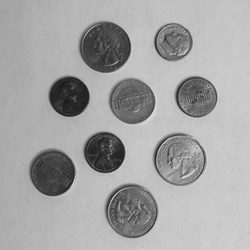

(250, 250)

In [1]:
# USAGE
# python blurring.py --image ../images/beach.png
import os
import argparse
import pathlib
from typing import Union, Any

import mahotas
import cv2
import imutils
# Import the necessary packages
import numpy as np
from PIL import Image
from IPython.display import display
# Import the necessary packages
from matplotlib import pyplot as plt

# Construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())

args = {}

current_folder = pathlib.Path(
    f"/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks")
print(current_folder)

# # Calculating path to the input data
args["image"] = pathlib.Path(
    f"{current_folder.parent}/images/coins.png").resolve()

print(args["image"])

assert args["image"].exists()

# _image = f"{args['image']}"
image: Union[np.ndarray, Any]
# # # Load the image and show it
image = cv2.imread(f"{args['image']}")

# Load the image, convert it to grayscale, and blur it slightly
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blurred = cv2.GaussianBlur(image, (5, 5), 0)

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(image))

image.shape


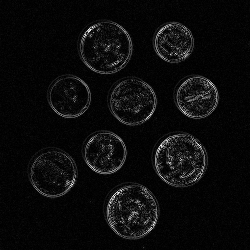

In [2]:
#  Compute the Laplacian of the image
# why are we using 64 bit floating point now? 
#If we don't use this, we'll miss edges, specifically black -> white 
lap = cv2.Laplacian(image, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(lap))

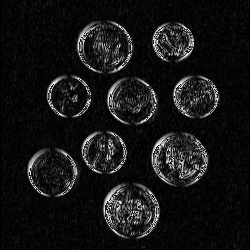

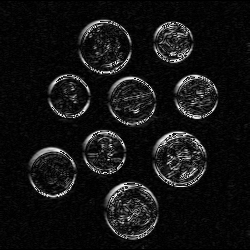

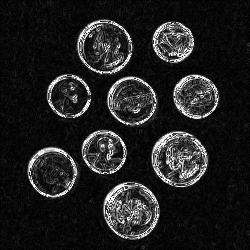

In [3]:
# Compute gradients along the X and Y axis, respectively
sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1)

# The sobelX and sobelY images are now of the floating
# point data type -- we need to take care when converting
# back to an 8-bit unsigned integer that we do not miss
# any images due to clipping values outside the range
# of [0, 255]. First, we take the absolute value of the
# graident magnitude images, THEN we convert them back
# to 8-bit unsigned integers
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

# We can combine our Sobel gradient images using our
# bitwise OR
sobelCombined = cv2.bitwise_or(sobelX, sobelY)

display(Image.fromarray(sobelX))
display(Image.fromarray(sobelY))
display(Image.fromarray(sobelCombined))